In [1]:
import torch;
torch.__version__

'2.4.1'

In [2]:
import sys
print(sys.version)

3.11.4 (v3.11.4:d2340ef257, Jun  6 2023, 19:15:51) [Clang 13.0.0 (clang-1300.0.29.30)]


## PyTorch Tensors

In [3]:
z = torch.zeros(4, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [4]:
i = torch.ones((4, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [5]:
torch.manual_seed(24)
r1 = torch.rand(3, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(3, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(24)
r3 = torch.rand(3, 2)
print('\nShould match r1:')
print(r3) 

A random tensor:
tensor([[0.7644, 0.3751],
        [0.0751, 0.5308],
        [0.9660, 0.2770]])

A different random tensor:
tensor([[0.3372, 0.8910],
        [0.4304, 0.3090],
        [0.3993, 0.5183]])

Should match r1:
tensor([[0.7644, 0.3751],
        [0.0751, 0.5308],
        [0.9660, 0.2770]])


In [6]:
ones = torch.ones(3, 3)
print(ones)

threes = torch.ones(3, 3) * 3 # every element is multiplied by 3
print(threes)

fours = ones + threes       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
torch.Size([3, 3])


In [7]:
r = (torch.rand(2, 2) - 0.6) * 2 
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.6022, -0.4981],
        [-1.0941, -0.8023]])

Absolute value of r:
tensor([[0.6022, 0.4981],
        [1.0941, 0.8023]])

Inverse sine of r:
tensor([[-0.6463, -0.5214],
        [    nan, -0.9312]])

Determinant of r:
tensor(-0.0618)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.4988, -0.8667],
        [-0.8667,  0.4988]]),
S=tensor([1.5653, 0.0395]),
V=tensor([[ 0.7978, -0.6030],
        [ 0.6030,  0.7978]]))

Average and standard deviation of r:
(tensor(0.2623), tensor(-0.7492))

Maximum value of r:
tensor(-0.4981)


## PYTORCH MODELS

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the modified LeNet model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (grayscale), 6 output channels, 5x5 kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 comes from image dimension after pooling
        self.fc2 = nn.Linear(120, 84)
        # Additional fully connected layers
        self.fc_extra1 = nn.Linear(84, 64)
        self.fc_extra2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc_extra1(x))  # Pass through the new fully connected layer
        x = F.relu(self.fc_extra2(x))  # Pass through the second new fully connected layer
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # All dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Instantiate the model
net = LeNet()
print(net)


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc_extra1): Linear(in_features=84, out_features=64, bias=True)
  (fc_extra2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [9]:
input = torch.rand(1, 1, 32, 32)  # Batch size 1, 1 channel, 32x32 image
print('\nImage batch shape:')
print(input.shape)

# Forward pass the input through the modified model
output = net(input)               
print('\nRaw output:')
print(output)
print('Output shape:', output.shape)


Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.1063,  0.0334, -0.0590, -0.0148, -0.1551,  0.0848,  0.1579, -0.0275,
          0.1578,  0.1663]], grad_fn=<AddmmBackward0>)
Output shape: torch.Size([1, 10])


## DATASETS AND DATALOADERS

In [10]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4814, 0.4822, 0.4465), (0.2570, 0.2435, 0.2616))])



In [11]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170498071/170498071 [00:18<00:00, 9423641.47it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  cat  ship plane   dog


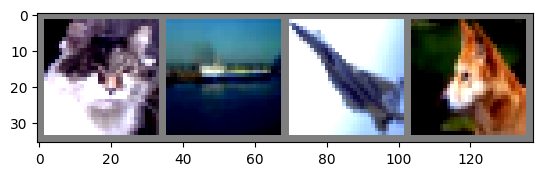

In [13]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [15]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


plane horse   cat  bird


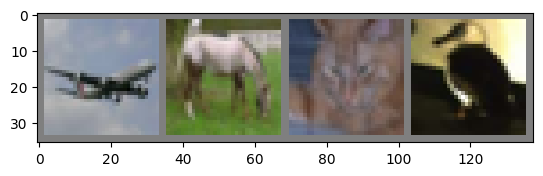

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.8)

In [19]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.218
[1,  4000] loss: 1.868
[1,  6000] loss: 1.690
[1,  8000] loss: 1.572
[1, 10000] loss: 1.502
[1, 12000] loss: 1.461
[2,  2000] loss: 1.382
[2,  4000] loss: 1.375
[2,  6000] loss: 1.338
[2,  8000] loss: 1.318
[2, 10000] loss: 1.306
[2, 12000] loss: 1.276
[3,  2000] loss: 1.213
[3,  4000] loss: 1.185
[3,  6000] loss: 1.206
[3,  8000] loss: 1.183
[3, 10000] loss: 1.189
[3, 12000] loss: 1.156
Finished Training


In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


## Introduction to PyTorch Tensors

In [21]:
# Tensor shape

x = torch.empty(3, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([3, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([3, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([3, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([3, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([3, 2, 3])
tensor([[[0.3924, 0.5349, 0.3512],
         [0.0602, 0.6268, 0.3117]],

        [[0.0357, 0.6506, 0.2205],
         [0.2593, 0.8586, 0.7017]],

        [[0.1213, 0.7918, 0.0055],
         [0.4019, 0.7628, 0.1084]]])


In [22]:
some_constants = torch.tensor([[4.141526, 5.71828], [2.61803, 1.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[4.1415, 5.7183],
        [2.6180, 1.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


In [23]:
# Tensor DataType

a = torch.ones((3, 3), dtype=torch.int16)
print(a)

b = torch.rand((3, 3), dtype=torch.float64) * 30.
print(b)

c = b.to(torch.int32)
print(c)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[ 7.2314, 20.9135, 28.0724],
        [27.7144, 12.0375,  8.1864],
        [19.6813,  5.2013, 20.9081]], dtype=torch.float64)
tensor([[ 7, 20, 28],
        [27, 12,  8],
        [19,  5, 20]], dtype=torch.int32)


In [24]:
# Math & Logic with PyTorch Tensors

ones = torch.zeros(2, 2) + 2
twos = torch.ones(2, 2) * 3
threes = (torch.ones(2, 2) * 10 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.6

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
tensor([[9., 9.],
        [9., 9.]])
tensor([[1.9332, 1.9332],
        [1.9332, 1.9332]])


In [25]:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

tensor([[ 3.,  9.],
        [27., 81.]])
tensor([[11., 11.],
        [11., 11.]])
tensor([[40.5000, 40.5000],
        [40.5000, 40.5000]])


In [26]:
# Tensor Broadcasting

rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

tensor([[0.2662, 0.3771, 0.1410, 0.7745],
        [0.1874, 0.6557, 0.1524, 0.7523]])
tensor([[0.5323, 0.7542, 0.2819, 1.5491],
        [0.3749, 1.3114, 0.3048, 1.5046]])


In [27]:
a =     torch.ones(4, 3, 2)

b = a * torch.rand(   3, 2) 
print(b)

c = a * torch.rand(   3, 1) 
print(c)

d = a * torch.rand(   1, 2) 
print(d)

tensor([[[9.5414e-01, 8.4751e-01],
         [7.9064e-01, 8.6111e-04],
         [7.0677e-01, 7.5238e-01]],

        [[9.5414e-01, 8.4751e-01],
         [7.9064e-01, 8.6111e-04],
         [7.0677e-01, 7.5238e-01]],

        [[9.5414e-01, 8.4751e-01],
         [7.9064e-01, 8.6111e-04],
         [7.0677e-01, 7.5238e-01]],

        [[9.5414e-01, 8.4751e-01],
         [7.9064e-01, 8.6111e-04],
         [7.0677e-01, 7.5238e-01]]])
tensor([[[0.7298, 0.7298],
         [0.3648, 0.3648],
         [0.4727, 0.4727]],

        [[0.7298, 0.7298],
         [0.3648, 0.3648],
         [0.4727, 0.4727]],

        [[0.7298, 0.7298],
         [0.3648, 0.3648],
         [0.4727, 0.4727]],

        [[0.7298, 0.7298],
         [0.3648, 0.3648],
         [0.4727, 0.4727]]])
tensor([[[0.6352, 0.4683],
         [0.6352, 0.4683],
         [0.6352, 0.4683]],

        [[0.6352, 0.4683],
         [0.6352, 0.4683],
         [0.6352, 0.4683]],

        [[0.6352, 0.4683],
         [0.6352, 0.4683],
         [0.6352, 0.

In [28]:
# common functions

import math
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.linalg.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.linalg.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.linalg.svd(m3))       # singular value decomposition

Common functions:
tensor([[0.4757, 0.2832, 0.2942, 0.3264],
        [0.2643, 0.3889, 0.1599, 0.0022]])
tensor([[-0., -0., 1., 1.],
        [-0., 1., -0., 1.]])
tensor([[-1., -1.,  0.,  0.],
        [-1.,  0., -1.,  0.]])
tensor([[-0.4757, -0.2832,  0.2942,  0.3264],
        [-0.2643,  0.3889, -0.1599,  0.0022]])

Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])

Bitwise XOR:
tensor([3, 2, 1])

Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])

Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])

Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.0786, 0.6877],
        [0.8768, 0.9800]])
tensor([[0.2359, 2.0630],
        [2.6304, 2.9401]])
torch.return_types.linalg_svd(
U=tensor([[-0.4220, -0.9066],
        [-0.9066,  0.4220]]),
S=tensor([4.3215, 1.0952]),
Vh=tensor([[-0.5749, -0.8182],
        [ 0.8182, -0.5749]

In [29]:
#Altering Tensors in Place

a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 5])
print('a:')
print(a)
print(torch.sin(a))  
print(a)              

b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 5])
print('\nb:')
print(b)
print(torch.sin_(b))  
print(b)              

a:
tensor([0.0000, 0.7854, 1.5708, 1.8850])
tensor([0.0000, 0.7071, 1.0000, 0.9511])
tensor([0.0000, 0.7854, 1.5708, 1.8850])

b:
tensor([0.0000, 0.7854, 1.5708, 1.8850])
tensor([0.0000, 0.7071, 1.0000, 0.9511])
tensor([0.0000, 0.7071, 1.0000, 0.9511])


In [30]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)

print(c)
d = torch.matmul(a, b, out=c)
print(c)                # contents of c have changed

assert c is d           # test c & d are same object, not just containing equal values
assert id(c) == old_id  # make sure that our new c is the same object as the old one

torch.rand(2, 2, out=c) # works for creation too!
print(c)                # c has changed again
assert id(c) == old_id  # still the same object!

tensor([[0., 0.],
        [0., 0.]])
tensor([[0.0467, 0.3283],
        [0.7787, 1.0560]])
tensor([[0.7981, 0.8707],
        [0.3021, 0.3861]])


In [31]:
# copying tensors

a = torch.ones(2, 2)
b = a

a[0][1] = 561  # we change a...
print(b)       # ...and b is also altered

a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)               # ...but b is still all ones

tensor([[  1., 561.],
        [  1.,   1.]])
tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


In [32]:
# Moving to Accelerator

import torch

# Checking for GPU or accelerator availability
if torch.cuda.is_available():
    print("We have an accelerator (CUDA available)!")
else:
    print("No accelerator available (CUDA not found).")

    

No accelerator available (CUDA not found).


In [33]:
my_device = torch.cuda.current_accelerator() if torch.cuda.is_available() else torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cpu
tensor([[0.9196, 0.8689],
        [0.8729, 0.5784]])


In [34]:
# Manipulating Tensor Shapes
a = torch.rand(3, 228, 228)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)


torch.Size([3, 228, 228])
torch.Size([1, 3, 228, 228])


In [35]:
c = torch.rand(1, 3, 3, 1, 1)
print(c)

tensor([[[[[0.3428]],

          [[0.3043]],

          [[0.6124]]],


         [[[0.8711]],

          [[0.8708]],

          [[0.6216]]],


         [[[0.7322]],

          [[0.7988]],

          [[0.9034]]]]])


In [36]:
a = torch.ones(4, 3, 2)

c = a * torch.rand(   3, 1) 
print(c)

tensor([[[0.6084, 0.6084],
         [0.5253, 0.5253],
         [0.1118, 0.1118]],

        [[0.6084, 0.6084],
         [0.5253, 0.5253],
         [0.1118, 0.1118]],

        [[0.6084, 0.6084],
         [0.5253, 0.5253],
         [0.1118, 0.1118]],

        [[0.6084, 0.6084],
         [0.5253, 0.5253],
         [0.1118, 0.1118]]])


In [37]:
a = torch.ones(5, 3, 2)
b = torch.rand(   3)     # trying to multiply a * b will give a runtime error
c = b.unsqueeze(1)       # change to a 2-dimensional tensor, adding new dim at the end
print(c.shape)
print(a * c)             # broadcasting works again!

torch.Size([3, 1])
tensor([[[0.0576, 0.0576],
         [0.7106, 0.7106],
         [0.0897, 0.0897]],

        [[0.0576, 0.0576],
         [0.7106, 0.7106],
         [0.0897, 0.0897]],

        [[0.0576, 0.0576],
         [0.7106, 0.7106],
         [0.0897, 0.0897]],

        [[0.0576, 0.0576],
         [0.7106, 0.7106],
         [0.0897, 0.0897]],

        [[0.0576, 0.0576],
         [0.7106, 0.7106],
         [0.0897, 0.0897]]])


In [38]:
batch_me = torch.rand(3, 226, 226)
print(batch_me.shape)
batch_me.unsqueeze_(0)
print(batch_me.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [39]:
output3d = torch.rand(6, 20, 20)
print(output3d.shape)

input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

# can also call it as a method on the torch module:
print(torch.reshape(output3d, (6 * 20 * 20,)).shape)

torch.Size([6, 20, 20])
torch.Size([2400])
torch.Size([2400])


In [40]:
# Numpy bridge

import numpy as np

numpy_array = np.ones((3, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [41]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.5784, 0.5853, 0.4148],
        [0.3500, 0.6906, 0.2244]])
[[0.57842743 0.58529466 0.41478038]
 [0.3499999  0.6906049  0.22438121]]


In [42]:
numpy_array[1, 1] = 24
print(pytorch_tensor)

pytorch_rand[1, 1] = 18
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 24.,  1.],
        [ 1.,  1.,  1.]], dtype=torch.float64)
[[ 0.57842743  0.58529466  0.41478038]
 [ 0.3499999  18.          0.22438121]]


## The Fundamentals of Autograd

tensor([0.0000, 0.3307, 0.6614, 0.9921, 1.3228, 1.6535, 1.9842, 2.3149, 2.6456,
        2.9762, 3.3069, 3.6376, 3.9683, 4.2990, 4.6297, 4.9604, 5.2911, 5.6218,
        5.9525, 6.2832], requires_grad=True)


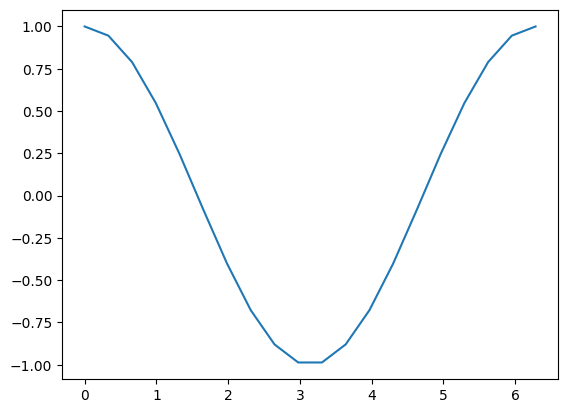

In [43]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

a = torch.linspace(0., 2. * math.pi, steps=20, requires_grad=True)
print(a)

b = torch.cos(a)
plt.plot(a.detach(), b.detach())



In [44]:
print(b)

tensor([ 1.0000,  0.9458,  0.7891,  0.5469,  0.2455, -0.0826, -0.4017, -0.6773,
        -0.8795, -0.9864, -0.9864, -0.8795, -0.6773, -0.4017, -0.0826,  0.2455,
         0.5469,  0.7891,  0.9458,  1.0000], grad_fn=<CosBackward0>)


In [45]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 2.0000,  1.8916,  1.5783,  1.0939,  0.4910, -0.1652, -0.8034, -1.3546,
        -1.7589, -1.9727, -1.9727, -1.7589, -1.3546, -0.8034, -0.1652,  0.4910,
         1.0939,  1.5783,  1.8916,  2.0000], grad_fn=<MulBackward0>)
tensor([ 3.0000,  2.8916,  2.5783,  2.0939,  1.4910,  0.8348,  0.1966, -0.3546,
        -0.7589, -0.9727, -0.9727, -0.7589, -0.3546,  0.1966,  0.8348,  1.4910,
         2.0939,  2.5783,  2.8916,  3.0000], grad_fn=<AddBackward0>)


In [46]:
out = d.sum()
print(out)

tensor(22.0000, grad_fn=<SumBackward0>)


In [47]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x1495daaa0>, 0), (None, 0))
((<CosBackward0 object at 0x1495dbb20>, 0), (None, 0))
((<AccumulateGrad object at 0x1495d9de0>, 0),)
()

c:

b:

a:
None


tensor([-0.0000e+00, -6.4940e-01, -1.2284e+00, -1.6743e+00, -1.9388e+00,
        -1.9932e+00, -1.8315e+00, -1.4714e+00, -9.5189e-01, -3.2919e-01,
         3.2919e-01,  9.5190e-01,  1.4714e+00,  1.8315e+00,  1.9932e+00,
         1.9388e+00,  1.6743e+00,  1.2284e+00,  6.4940e-01, -3.4969e-07])


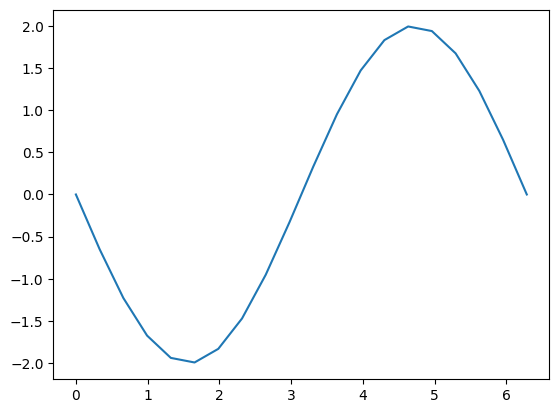

In [48]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

In [49]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 2
out = d.sum()

In [50]:
# Autograd in Training
BATCH_SIZE = 20
DIM_IN = 1000
HIDDEN_SIZE = 70
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [51]:
print(model.layer2.weight[0][0:10]) 
print(model.layer2.weight.grad)

tensor([ 0.0417, -0.0953, -0.1099, -0.0635, -0.0670, -0.0965,  0.0692, -0.0770,
        -0.0001, -0.0712], grad_fn=<SliceBackward0>)
None


In [52]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(226.1898, grad_fn=<SumBackward0>)


In [53]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0417, -0.0953, -0.1099, -0.0635, -0.0670, -0.0965,  0.0692, -0.0770,
        -0.0001, -0.0712], grad_fn=<SliceBackward0>)
tensor([ -7.2016,  -4.9874,  -2.4962,  -7.1727,  -6.1770,  -3.6634, -10.1367,
         -9.9895,  -2.8631,  -7.9322])


In [54]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0489, -0.0904, -0.1075, -0.0563, -0.0608, -0.0928,  0.0793, -0.0670,
         0.0027, -0.0632], grad_fn=<SliceBackward0>)
tensor([ -7.2016,  -4.9874,  -2.4962,  -7.1727,  -6.1770,  -3.6634, -10.1367,
         -9.9895,  -2.8631,  -7.9322])


In [55]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none=False)

print(model.layer2.weight.grad[0][0:10])

tensor([ -7.2016,  -4.9874,  -2.4962,  -7.1727,  -6.1770,  -3.6634, -10.1367,
         -9.9895,  -2.8631,  -7.9322])
tensor([-23.7095,   0.4488,   6.3401, -15.4411, -12.5499,  -2.5568, -32.1855,
        -55.5126, -13.0288,  -8.0399])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [56]:
#Turning Autograd Off and On

a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [57]:
a = torch.ones(2, 3, requires_grad=True) * 3
b = torch.ones(2, 3, requires_grad=True) * 34
c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[37., 37., 37.],
        [37., 37., 37.]], grad_fn=<AddBackward0>)
tensor([[37., 37., 37.],
        [37., 37., 37.]])
tensor([[102., 102., 102.],
        [102., 102., 102.]], grad_fn=<MulBackward0>)


In [58]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [59]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.3681, 0.2634, 0.8139, 0.0262, 0.3597], requires_grad=True)
tensor([0.3681, 0.2634, 0.8139, 0.0262, 0.3597])


In [60]:
#Autograd and In-place Operations

a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [61]:
# the above output is expected

In [62]:
# Autograd Profiler

device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(800):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::mul        50.10%       2.746ms        50.10%       2.746ms       3.432us           800  
    aten::div        49.90%       2.734ms        49.90%       2.734ms       3.418us           800  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 5.480ms



In [63]:
# More Autograd Detail and the High-Level API

x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 431.8339, 1463.0240,  641.3862], grad_fn=<MulBackward0>)


In [64]:
v = torch.tensor([0.1, 1.0, 0.00001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-02])


In [65]:
# The High-Level API

def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.1126]), tensor([0.1538]))


(tensor([[2.2384]]), tensor([[3.]]))

In [66]:
inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.3774, 0.9775, 0.5012]), tensor([0.4387, 0.4703, 0.7515]))


(tensor([[2.9170, 0.0000, 0.0000],
         [0.0000, 5.3155, 0.0000],
         [0.0000, 0.0000, 3.3014]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

In [67]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([-559.6221, -931.3870, -207.2944]),
 tensor([1.0240e+02, 1.0240e+03, 1.0240e-01]))

## Building Models with PyTorch

In [68]:
import torch

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(100, 256)  
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(256, 12)   
        self.softmax = torch.nn.Softmax(dim=1)    

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)


The model:
TinyModel(
  (linear1): Linear(in_features=100, out_features=256, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=256, out_features=12, bias=True)
  (softmax): Softmax(dim=1)
)


Just one layer:
Linear(in_features=256, out_features=12, bias=True)


Model params:
Parameter containing:
tensor([[-0.0704, -0.0445,  0.0376,  ..., -0.0972, -0.0382, -0.0928],
        [-0.0440, -0.0875,  0.0560,  ..., -0.0970, -0.0104, -0.0230],
        [-0.0755, -0.0308, -0.0985,  ...,  0.0742,  0.0991,  0.0245],
        ...,
        [-0.0034, -0.0897,  0.0329,  ..., -0.0180, -0.0052,  0.0153],
        [ 0.0022, -0.0639,  0.0975,  ...,  0.0542, -0.0465,  0.0340],
        [-0.0225,  0.0973,  0.0815,  ..., -0.0663, -0.0828,  0.0518]],
       requires_grad=True)
Parameter containing:
tensor([-0.0116, -0.0469,  0.0322,  0.0119, -0.0188, -0.0548,  0.0300,  0.0722,
         0.0424,  0.0278,  0.0210, -0.0874, -0.0668, -0.0745, -0.0628, -0.0364,
         0.0604, -0.0117, -0.0338, -0.0095,

In [69]:
lin = torch.nn.Linear(3, 2)
x = torch.rand(2, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

Input:
tensor([[0.6316, 0.8049, 0.4857],
        [0.5726, 0.3239, 0.9661]])


Weight and Bias parameters:
Parameter containing:
tensor([[0.1079, 0.1104, 0.4690],
        [0.3237, 0.5218, 0.5265]], requires_grad=True)
Parameter containing:
tensor([-0.5546,  0.0592], requires_grad=True)


Output:
tensor([[-0.1698,  0.9394],
        [-0.0040,  0.9223]], grad_fn=<AddmmBackward0>)


In [70]:
#Convolutional Layers

import torch.nn.functional as F
import torch.nn as nn

class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (grayscale), 8 output channels, 5x5 conv kernel
        self.conv1 = nn.Conv2d(1, 8, 5)  
        self.conv2 = nn.Conv2d(8, 16, 3)  
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 6 * 6, 128)  
        self.fc2 = nn.Linear(128, 90) 
        self.fc3 = nn.Linear(90, 10)

    def forward(self, x):
        # Max pooling with a 2x2 window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        num_features = 1
        for s in x.size()[1:]:  # all dimensions except batch size
            num_features *= s
        return num_features



In [71]:
# recurrent layers

import torch.nn as nn
import torch.nn.functional as F

class LSTMTagger(nn.Module):

    def __init__(self, embed_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embed_dim)

        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=2, dropout=0.1)

        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        return F.log_softmax(tag_space, dim=1)


In [72]:
# Other Layers and Functions
# Data Manipulation Layers

my_tensor = torch.rand(1, 6, 6)
print(my_tensor)

maxpool_layer = torch.nn.MaxPool2d(3)
print(maxpool_layer(my_tensor))

tensor([[[0.1557, 0.1757, 0.2677, 0.8848, 0.9332, 0.9379],
         [0.3908, 0.3136, 0.8727, 0.0210, 0.3442, 0.3376],
         [0.9880, 0.8922, 0.2040, 0.4343, 0.4451, 0.5664],
         [0.4348, 0.4496, 0.1762, 0.1195, 0.0643, 0.8608],
         [0.1600, 0.6577, 0.3868, 0.0259, 0.3211, 0.0373],
         [0.7399, 0.0919, 0.6216, 0.2400, 0.2352, 0.0527]]])
tensor([[[0.9880, 0.9379],
         [0.7399, 0.8608]]])


In [73]:
#normalisation layer

my_tensor = torch.rand(1, 4, 4) * 20 + 5
print(my_tensor)

print(my_tensor.mean())

norm_layer = torch.nn.BatchNorm1d(4)
normed_tensor = norm_layer(my_tensor)
print(normed_tensor)

print(normed_tensor.mean())

tensor([[[13.9285, 21.7321, 18.4989,  9.9961],
         [ 8.0421, 18.1633, 15.6748, 18.9762],
         [10.2130, 11.0305,  7.8551, 13.8579],
         [ 9.1939, 24.7449, 20.9520, 12.2173]]])
tensor(14.6923)
tensor([[[-0.4736,  1.2776,  0.5520, -1.3560],
         [-1.6618,  0.6834,  0.1068,  0.8717],
         [-0.2453,  0.1358, -1.3445,  1.4539],
         [-1.2020,  1.2629,  0.6618, -0.7227]]],
       grad_fn=<NativeBatchNormBackward0>)
tensor(-7.4506e-08, grad_fn=<MeanBackward0>)


In [74]:
#dropout layer

my_tensor = torch.rand(1, 4, 4)

dropout = torch.nn.Dropout(p=0.4)
print(dropout(my_tensor))
print(dropout(my_tensor))

tensor([[[0.5388, 0.8589, 0.0000, 0.0000],
         [0.0000, 1.3096, 0.0000, 0.0000],
         [0.0000, 1.1506, 0.9745, 0.0000],
         [1.5181, 0.0000, 0.0937, 1.4632]]])
tensor([[[0.5388, 0.8589, 0.0000, 0.0000],
         [1.6267, 1.3096, 0.4261, 1.0506],
         [0.0000, 1.1506, 0.0000, 1.1601],
         [0.0000, 0.0000, 0.0937, 1.4632]]])


## PyTorch TensorBoard Support

In [75]:
# intro

# PyTorch model and training necessities
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Image datasets and image manipulation
import torchvision
import torchvision.transforms as transforms

# Image display
import matplotlib.pyplot as plt
import numpy as np

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter

#import tensorflow as tf
import tensorboard as tb
#tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26421880/26421880 [00:23<00:00, 1107445.79it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 270832.03it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:01<00:00, 2943929.20it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 3528726.42it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



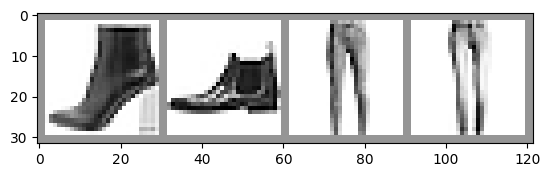

In [76]:
# showing images on tb

# Gather datasets and prepare them for consumption
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Store separate training and validations splits in ./data
training_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
validation_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=4,
                                              shuffle=True,
                                              num_workers=2)


validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=4,
                                                shuffle=False,
                                                num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Extract a batch of 4 images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

In [77]:
# Default log_dir argument is "runs" - but it's good to be specific
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# Write image data to TensorBoard log dir
writer.add_image('Four Fashion-MNIST Images', img_grid)
writer.flush()

In [78]:

# Graphing scalar to visualize training

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)  
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 5)  
        self.fc1 = nn.Linear(16 * 4 * 4, 128)  
        self.fc2 = nn.Linear(128, 86)  
        self.fc3 = nn.Linear(86, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.85)  

print(len(validation_loader))
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0

    for i, data in enumerate(training_loader, 0):
        # basic training loop
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 800 == 799:    # Changed 1000 to 800
            print('Batch {}'.format(i + 1))
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted eg. dropout layer
            net.train(False) # Switching to evaluation mode, eg. turning off regularisation
            for j, vdata in enumerate(validation_loader, 0):
                vinputs, vlabels = vdata
                voutputs = net(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()
            net.train(True) # Switching back to training mode, eg. turning on regularisation

            avg_loss = running_loss / 800  # Updated to match batch interval change
            avg_vloss = running_vloss / len(validation_loader)

            # Log the running loss averaged per batch
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(training_loader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()


2500
Batch 800
Batch 1600
Batch 2400
Batch 3200
Batch 4000
Batch 4800
Batch 5600
Batch 6400
Batch 7200
Batch 8000
Batch 8800
Batch 9600
Batch 10400
Batch 11200
Batch 12000
Batch 12800
Batch 13600
Batch 14400
Finished Training


In [79]:
# Visualizing Your Model

# Select a random subset of data and corresponding labels
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Extract a random subset of data
images, labels = select_n_random(training_set.data, training_set.targets)

# get the class labels for each image
class_labels = [classes[label] for label in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.flush()
writer.close()

## Training with PyTorch

In [80]:
import torch
import torchvision
import torchvision.transforms as transforms

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

Training set has 60000 instances
Validation set has 10000 instances


Shirt  Sneaker  Ankle Boot  Dress


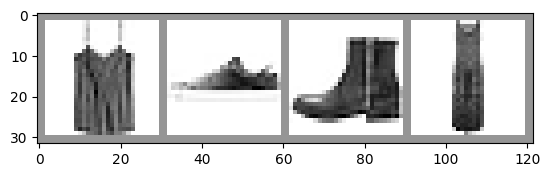

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

In [82]:
# the model and loss function
import torch.nn as nn
import torch.nn.functional as F
import torch

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)  
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 5)  
        self.fc1 = nn.Linear(16 * 4 * 4, 128) 
        self.fc2 = nn.Linear(128, 86) 
        self.fc3 = nn.Linear(86, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

# loss function
loss_fn = nn.CrossEntropyLoss()

dummy_outputs = torch.rand(4, 10) * 1.2 
dummy_labels = torch.tensor([2, 5, 3, 7])  

print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {:.4f}'.format(loss.item())) 



tensor([[0.3945, 0.7994, 0.6828, 0.7773, 0.1552, 0.4163, 0.7845, 1.0476, 0.3640,
         0.0022],
        [1.1520, 0.3465, 0.9913, 0.2434, 0.3102, 0.2129, 0.7529, 0.3718, 0.4161,
         0.9897],
        [1.1280, 0.6696, 0.1995, 1.0535, 0.3554, 0.5781, 0.9852, 0.9260, 0.3000,
         0.4716],
        [0.4121, 0.3697, 0.7357, 1.1271, 1.1294, 0.6360, 0.8401, 0.7700, 0.5333,
         0.6136]])
tensor([2, 5, 3, 7])
Total loss for this batch: 2.2963


In [83]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [84]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [85]:
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 20

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 0.9151718390495517
  batch 2000 loss: 0.6202472543679177
  batch 3000 loss: 0.5643725368448067
  batch 4000 loss: 0.5023965198763762
  batch 5000 loss: 0.4723432830864331
  batch 6000 loss: 0.46979231967101803
  batch 7000 loss: 0.43251952564913515
  batch 8000 loss: 0.42968929542462864
  batch 9000 loss: 0.40651063321530817
  batch 10000 loss: 0.3974895549704415
  batch 11000 loss: 0.3867344035843562
  batch 12000 loss: 0.390543200385524
  batch 13000 loss: 0.3753908852164786
  batch 14000 loss: 0.3749263427330952
  batch 15000 loss: 0.3650937195924398
LOSS train 0.3650937195924398 valid 0.3802827000617981
EPOCH 2:
  batch 1000 loss: 0.34066669863789867
  batch 2000 loss: 0.34289261889283623
  batch 3000 loss: 0.34036110875958003
  batch 4000 loss: 0.3560674356858071
  batch 5000 loss: 0.36043689324029904
  batch 6000 loss: 0.34826272739884373
  batch 7000 loss: 0.3376441782252755
  batch 8000 loss: 0.35428736261518495
  batch 9000 loss: 0.32638487796886695

  batch 12000 loss: 0.23441256945850605
  batch 13000 loss: 0.2530405623389972
  batch 14000 loss: 0.25301991141927777
  batch 15000 loss: 0.25494113227893184
LOSS train 0.25494113227893184 valid 0.3351253569126129
EPOCH 14:
  batch 1000 loss: 0.2040623566930498
  batch 2000 loss: 0.20064368989576328
  batch 3000 loss: 0.2309628026325029
  batch 4000 loss: 0.24195934486753698
  batch 5000 loss: 0.22598522325086737
  batch 6000 loss: 0.22960162732112133
  batch 7000 loss: 0.21978291978465914
  batch 8000 loss: 0.22687811251602036
  batch 9000 loss: 0.2567878430657679
  batch 10000 loss: 0.2393360516233382
  batch 11000 loss: 0.24522732806105563
  batch 12000 loss: 0.22108776113334
  batch 13000 loss: 0.23175209235037622
  batch 14000 loss: 0.23854024618455777
  batch 15000 loss: 0.26787296356071294
LOSS train 0.26787296356071294 valid 0.3434830904006958
EPOCH 15:
  batch 1000 loss: 0.23160182864897313
  batch 2000 loss: 0.23819254893491848
  batch 3000 loss: 0.21883910481074348
  batch 

In [88]:
saved_model = GarmentClassifier()
#saved_model.load_state_dict(torch.load("dl"))

In [87]:
# Save the model's state dictionary (weights)
torch.save(model.state_dict(), "a0_part_1_yavarkha.pt")